In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

In [ ]:
print("Iris Dataset Head:")
print(df.head())

Iris Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<ipython-input-18-9a5006fcc7b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='muted')


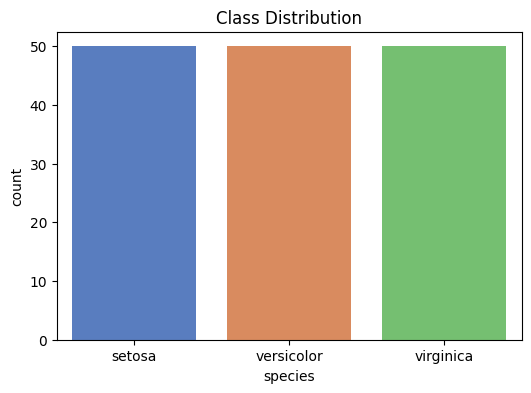

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette='muted')
plt.title("Class Distribution")
plt.show()

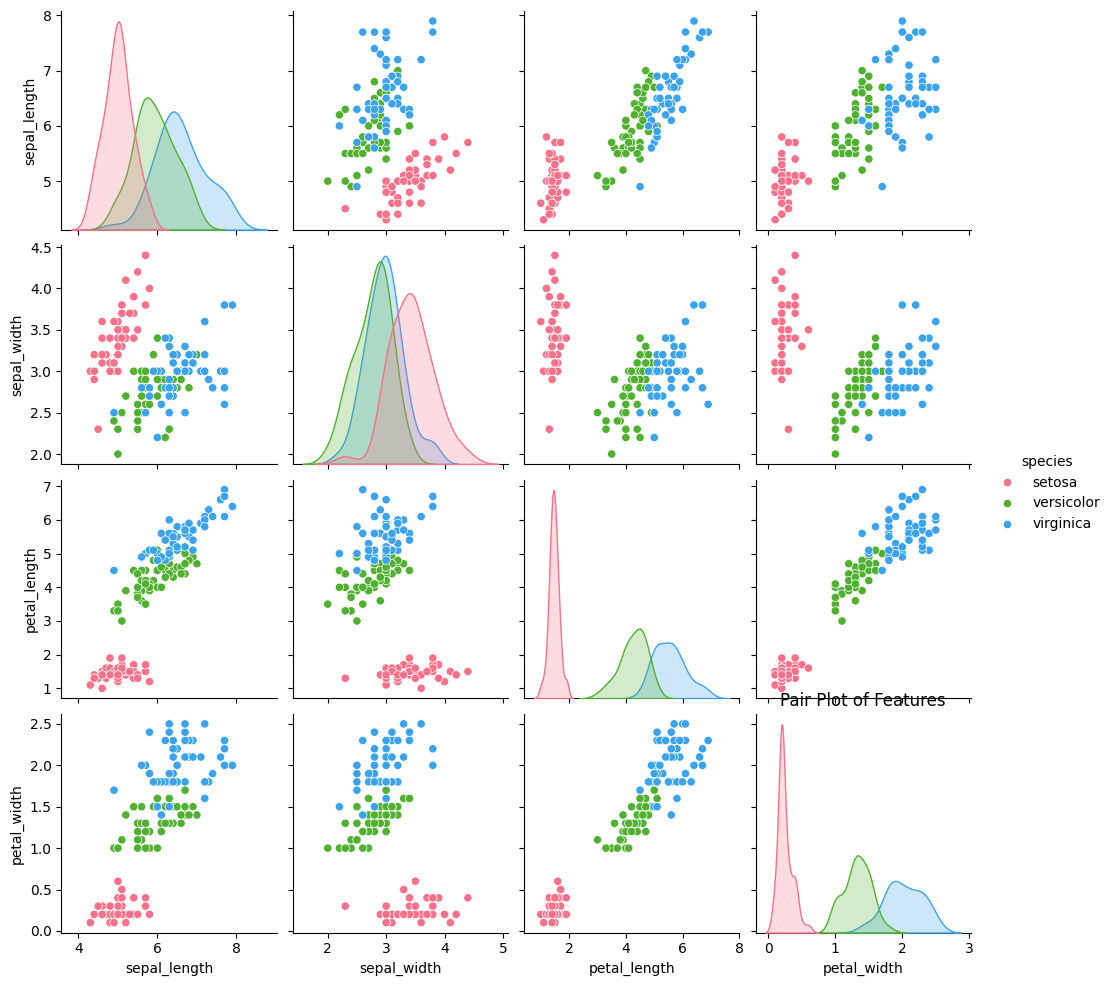

In [ ]:
sns.pairplot(df, hue="species", palette="husl")
plt.title("Pair Plot of Features")
plt.show()

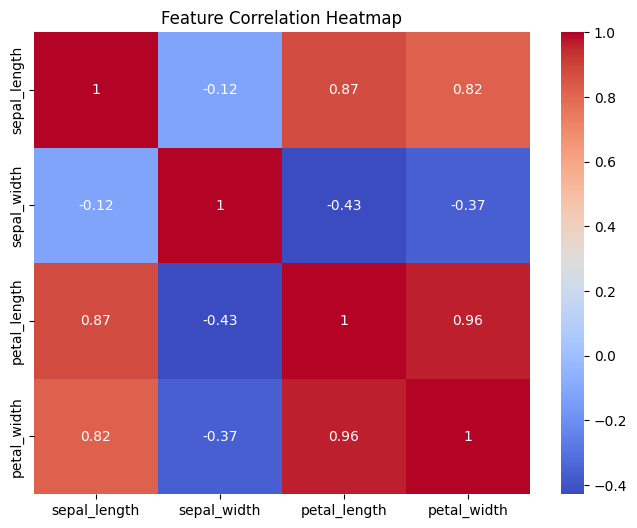

In [ ]:
plt.figure(figsize=(8, 6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
X = df.drop('species', axis=1)
y = df['species']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
print("\nTrain-Test Split:")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Train-Test Split:
Training Data Shape: (120, 4)
Testing Data Shape: (30, 4)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', random_state=42)


In [28]:
# Train and Evaluate Models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [30]:
# Train and Evaluate Models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [32]:

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return acc

In [33]:
log_reg_acc = evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")



--- Logistic Regression ---
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [34]:
rf_acc = evaluate_model(rf_clf, X_train, y_train, X_test, y_test, "Random Forest")


--- Random Forest ---
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [35]:
svm_acc = evaluate_model(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, "SVM Classifier")



--- SVM Classifier ---
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [36]:
def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    return np.mean(scores)

In [37]:

print("\n--- Cross-Validation Results ---")
log_cv = cross_validate_model(LogisticRegression(), X, y, "Logistic Regression")
rf_cv = cross_validate_model(RandomForestClassifier(n_estimators=100), X, y, "Random Forest")
svm_cv = cross_validate_model(SVC(kernel='rbf'),
X, y, "SVM")


--- Cross-Validation Results ---

Logistic Regression Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Accuracy: 0.9600

SVM Cross-Validation Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Accuracy: 0.9667



Model Performance Summary:
                 Model  Accuracy  Cross-Validation
0  Logistic Regression  0.933333          0.973333
1        Random Forest  0.900000          0.960000
2                  SVM  0.966667          0.966667


<ipython-input-38-4057acc33527>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


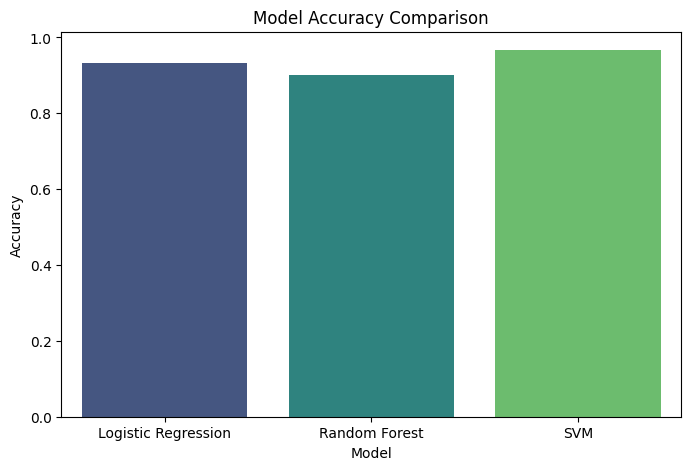

<ipython-input-38-4057acc33527>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Cross-Validation", data=results_df, palette="plasma")


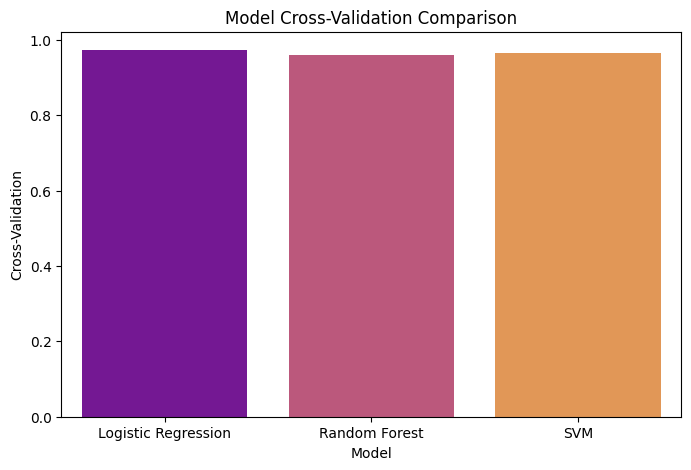

In [38]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [log_reg_acc, rf_acc, svm_acc],
    "Cross-Validation": [log_cv, rf_cv, svm_cv]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Visualize Model Performance
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Cross-Validation", data=results_df, palette="plasma")
plt.title("Model Cross-Validation Comparison")
plt.show()